## <center> Activity
<b>Data:</b> Environmental features such as temperature and humidity are used to detect the presence of humans in a room. <br>
<b>Dataset:</b> <i>occupancy_data.csv</i> <br>
<b>Goal:</b> Explore classification methods in order to predict whether or not someone in present in a room.

In [43]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

1) Load in, explore the data, and scale the data with StandardScaler.

In [2]:
df = pd.read_csv('occupancy_data.csv')
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.18,27.2720,426.0,721.25,0.004793,1
1,23.15,27.2675,429.5,714.00,0.004783,1
2,23.15,27.2450,426.0,713.50,0.004779,1
3,23.15,27.2000,426.0,708.25,0.004772,1
4,23.10,27.2000,426.0,704.50,0.004757,1


In [13]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.237873
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.425807
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


In [15]:
random_state = 4
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('Occupancy', axis=1))
y = df['Occupancy']

2) Perform a train-test split using random_state=4 and test_size=0.2

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state, test_size=0.2)

3) Train two base classifiers using Logistic Regression and Decision Trees and record their accuracy and F1 scores.<br>
-    What feature seems to be the most important for these classifiers?

In [26]:
lr_clf = LogisticRegression(random_state=random_state).fit(X_train, y_train)
dt_clf = DecisionTreeClassifier(random_state=random_state).fit(X_train, y_train)
models = [lr_clf, dt_clf]
model_names = ['Logistic Regression','Decision Tree']

In [27]:
model_performance = pd.DataFrame()
model_performance['Model'] = model_names
model_performance['Train Acc'] = [accuracy_score(y_train, model.predict(X_train)) for model in models]
model_performance['Train F1'] = [f1_score(y_train, model.predict(X_train)) for model in models]
model_performance['Test Acc'] = [accuracy_score(y_test, model.predict(X_test)) for model in models]
model_performance['Test F1'] = [f1_score(y_test, model.predict(X_test)) for model in models]
model_performance

,Model,Train Acc,Train F1,Test Acc,Test F1
0,Logistic Regression,0.949340,0.888211,0.939840,0.877805
1,Decision Tree,0.995241,0.989718,0.914672,0.829028


In [28]:
feature_df = pd.DataFrame()
feature_df['Feature'] = df.drop('Occupancy',axis=1).columns
feature_df['Logistic Regression'] = lr_clf.coef_[0]
feature_df['Decision Tree'] = dt_clf.feature_importances_
feature_df

,Feature,Logistic Regression,Decision Tree
0,Temperature,-0.592729,0.034213
1,Humidity,-0.031112,0.033724
2,Light,2.160886,0.757761
3,CO2,0.851208,0.121428
4,HumidityRatio,-0.051217,0.052874


3) Try a bagging model (Random Forest) and a boosting model (Ada Boost) and store accuracy and F1 scores in a dataframe with the LR and DT models.<br>
-    How do the models differ in performance?

In [29]:
rf_clf = RandomForestClassifier(random_state=random_state).fit(X_train, y_train)
ada_clf = AdaBoostClassifier(random_state=random_state).fit(X_train, y_train)
models.append(rf_clf)
models.append(ada_clf)
model_names.append('Random Forest')
model_names.append('Ada Boost')

In [30]:
model_performance = pd.DataFrame()
model_performance['Model'] = model_names
model_performance['Train Acc'] = [accuracy_score(y_train, model.predict(X_train)) for model in models]
model_performance['Train F1'] = [f1_score(y_train, model.predict(X_train)) for model in models]
model_performance['Test Acc'] = [accuracy_score(y_test, model.predict(X_test)) for model in models]
model_performance['Test F1'] = [f1_score(y_test, model.predict(X_test)) for model in models]
model_performance

,Model,Train Acc,Train F1,Test Acc,Test F1
0,Logistic Regression,0.949340,0.888211,0.939840,0.877805
1,Decision Tree,0.995241,0.989718,0.914672,0.829028
2,Random Forest,0.995241,0.989732,0.934929,0.867830
3,Ada Boost,0.949186,0.887606,0.939227,0.876095


In [34]:
feature_df['Random Forest'] = rf_clf.feature_importances_
feature_df['Ada Boost'] = rf_clf.feature_importances_
feature_df

,Feature,Logistic Regression,Decision Tree,Random Forest,Ada Boost
0,Temperature,-0.592729,0.034213,0.090090,0.090090
1,Humidity,-0.031112,0.033724,0.054620,0.054620
2,Light,2.160886,0.757761,0.503301,0.503301
3,CO2,0.851208,0.121428,0.279868,0.279868
4,HumidityRatio,-0.051217,0.052874,0.072121,0.072121


3) Try out a Voting Classifier and a Stacking Classifier and and add their scores to the dataframe.<br>
-    How do these ensemble methods compare?

In [32]:
estimators = [(name,model) for name,model in zip(model_names,models)]
vote_clf = VotingClassifier(estimators=estimators).fit(X_train, y_train)
stack_clf = StackingClassifier(estimators=estimators).fit(X_train, y_train)
models.append(vote_clf)
models.append(stack_clf)
model_names.append('Voting Classifier')
model_names.append('Stacking Classifier')

In [35]:
model_performance = pd.DataFrame()
model_performance['Model'] = model_names
model_performance['Train Acc'] = [accuracy_score(y_train, model.predict(X_train)) for model in models]
model_performance['Train F1'] = [f1_score(y_train, model.predict(X_train)) for model in models]
model_performance['Test Acc'] = [accuracy_score(y_test, model.predict(X_test)) for model in models]
model_performance['Test F1'] = [f1_score(y_test, model.predict(X_test)) for model in models]
model_performance

,Model,Train Acc,Train F1,Test Acc,Test F1
0,Logistic Regression,0.949340,0.888211,0.939840,0.877805
1,Decision Tree,0.995241,0.989718,0.914672,0.829028
2,Random Forest,0.995241,0.989732,0.934929,0.867830
3,Ada Boost,0.949186,0.887606,0.939227,0.876095
4,Voting Classifier,0.967608,0.925521,0.941682,0.879594
5,Stacking Classifier,0.958244,0.906272,0.941682,0.880503


4) Generate confusion matrices for each of the models. 
- What does this reveal? 
- In what scenarios would one model be better over the others?

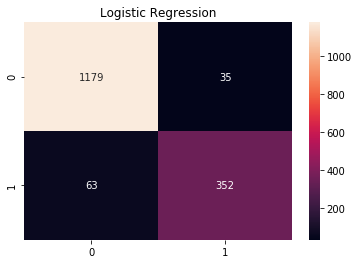

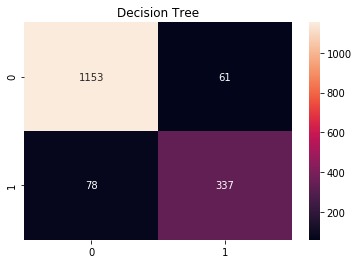

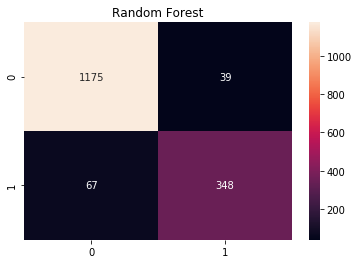

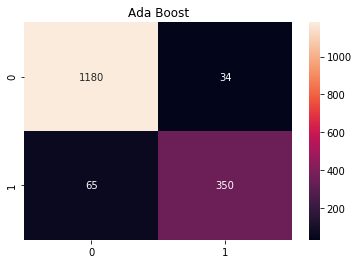

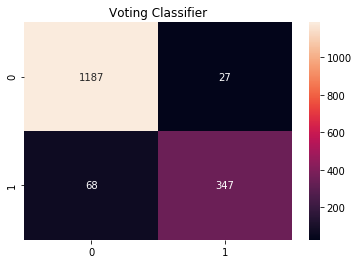

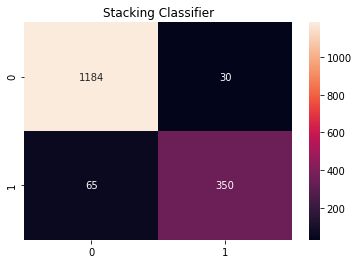

In [41]:
import seaborn as sns
cms = [confusion_matrix(y_test,model.predict(X_test)) for model in models]
for cm,name in zip(cms,model_names):
    sns.heatmap(cm,annot=True,fmt='g')
    plt.title(name)
    plt.show()

4) A recent reading from a room gave the following data:
- Temperature: 24 degrees C
- Humidity: 27.2050 g/m3
- Light: 420.5 lux
- CO2: 709.25 ppm
- Humidity Ratio: 0.004668
<br><br>
Is there someone in the room?

In [45]:
data = scaler.transform(np.array([24,27.2050,400.5,709.25, 0.004668]).reshape(1,-1))
for model,name in zip(models,model_names):
    print(name)
    print('Yes' if model.predict(data)[0]==1 else 'No')

Logistic Regression
No
Decision Tree
Yes
Random Forest
Yes
Ada Boost
Yes
Voting Classifier
Yes
Stacking Classifier
Yes
